# AirBnB Listing Analysis

## The Situation

You've just been hired as a Performance Analyst for AirBnB, a platform that allows individuals to rent out their homes for travellers.

## The Assignment

As AirBnB has grown in popularity, it has increasingly become the focus of regulations designed to limit the number of properties listed in each city.

**You've been asked to analyze Paris listings, with a focus on pricing. Leadership wants a visual summary of factors affecting pricing and whether regulations adopted in 2015 impacted listings in the Paris Market.**



## Objectives

1. Explore and profile the data to correct any quality issues.
2. Prepare and reformat the data for visualization
3. Visualize the data and identify key insights and recommendations

### Objective 1 -  Explore and profile the data to correct and quality issues.

#### Imports

In [13]:
import site
print(site.getsitepackages())

['/Users/cdcoonce/Documents/GitHub/Airbnb_Listing_Analysis/.venv/lib/python3.12/site-packages']


In [14]:
import pandas as pd


#### Read in the data

In [15]:
listings = pd.read_csv(
    '/Users/cdcoonce/Documents/GitHub/Airbnb_Listing_Analysis/data/Listings.csv',
    low_memory=False,
    encoding='ISO-8859-1',
    parse_dates=['host_since']
    )

listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [66]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

##### Reducing the column set and city

Reducing the column set will make it easier for us to focus on our time-series analysis. In addition, we need to filter by our city column to reduce the observations to focus on Paris

In [67]:
paris_listings = listings.query("city == 'Paris'").loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


#### Quality Assurance

In [68]:
paris_listings.query("host_since.isnull() == True")

,host_since,neighbourhood,city,accommodates,price
52879,NaT,Enclos-St-Laurent,Paris,2,57
52880,NaT,Enclos-St-Laurent,Paris,2,58
52881,NaT,Batignolles-Monceau,Paris,4,90
52882,NaT,Buttes-Montmartre,Paris,5,89
52883,NaT,Hotel-de-Ville,Paris,2,119
52884,NaT,Buttes-Montmartre,Paris,4,50
52885,NaT,Enclos-St-Laurent,Paris,6,220
52886,NaT,Popincourt,Paris,2,45
52887,NaT,Popincourt,Paris,4,100
52888,NaT,Menilmontant,Paris,2,50


In [ ]:
# using the mean to fill NaT datetime64 values
paris_listings['host_since'] = paris_listings['host_since'].fillna(paris_listings['host_since'].mean())

In [70]:
paris_listings.query("host_since.isnull() == True")

,host_since,neighbourhood,city,accommodates,price


In [71]:
paris_listings.describe()

,host_since,accommodates,price
count,64690,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867840,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 06:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-28 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [72]:
paris_listings.query('price == 0').count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [ ]:
# filtering the 62 values where price is zero
paris_listings = paris_listings[paris_listings['price'] != 0]
paris_listings.query('price == 0').count()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

### Objective 2 - Prepare and reformat the data for visualization

In [ ]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby('neighbourhood')
    .agg({'price': 'mean'})
    .sort_values('price')
)

paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [88]:
paris_listings_accommodations = (
    paris_listings[paris_listings['neighbourhood'] == "Elysee"]
    .groupby('accommodates')
    .agg({'price': 'mean'})
    .sort_values('price')
)

paris_listings_accommodations.head(20)

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [93]:
paris_listings_over_time = (
    paris_listings
    .set_index('host_since')
    .resample('YE')
    .agg({
        'neighbourhood': 'count',
        'price': 'mean'
    })
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


### Objective 3 - Visualize the data and identify key insights and recommendations

In [101]:
import seaborn as sns

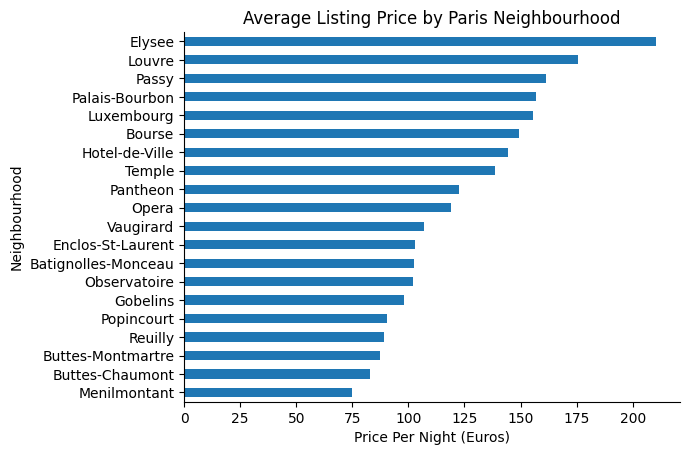

In [103]:
(paris_listings_neighbourhood.plot.barh(
    title="Average Listing Price by Paris Neighbourhood",
    xlabel= "Price Per Night (Euros)",
    ylabel="Neighbourhood",
    legend=False
))

sns.despine()

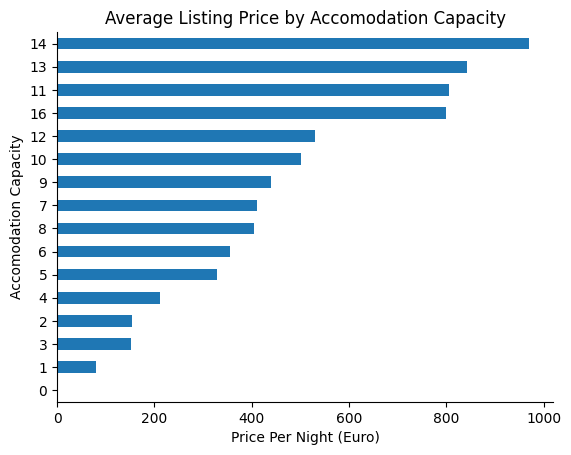

In [ ]:
(paris_listings_accommodations.plot.barh(
    title="Average Listing Price by Accomodation Capacity",
    xlabel="Price Per Night (Euro)",
    ylabel="Accomodation Capacity",
    legend=False
))

sns.despine()

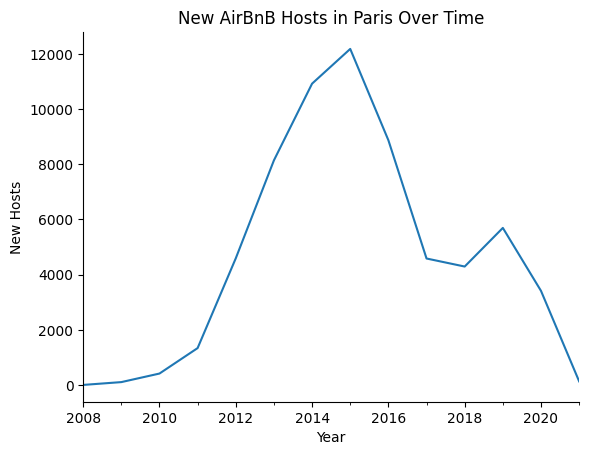

In [110]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    xlabel="Year",
    title="New AirBnB Hosts in Paris Over Time"
)

sns.despine()

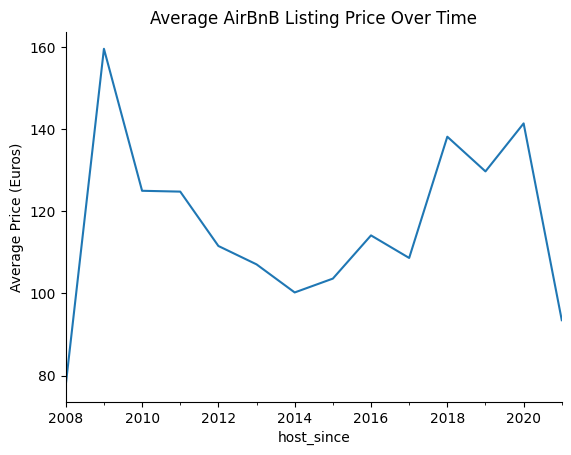

In [111]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnB Listing Price Over Time"
)

sns.despine()

In [112]:
import matplotlib.pyplot as plt

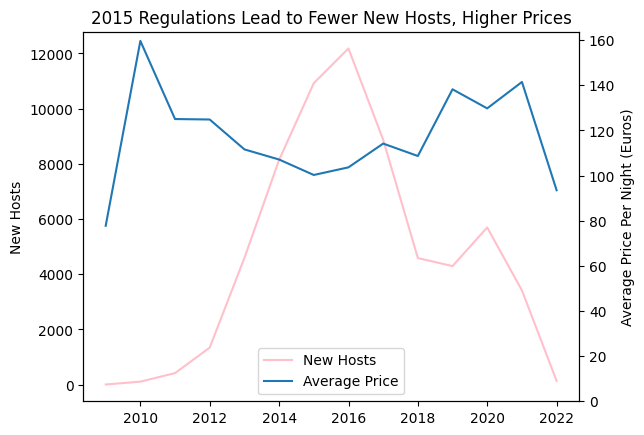

In [124]:
fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()
ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price"
)

ax2.set_ylim(0)
ax2.set_ylabel("Average Price Per Night (Euros)")
ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='lower center')